## Mathematical Animations WITH EASE | Ep. 01: An Invitation

This notebook contains the examples discussed in [this video](https://youtu.be/rUsUrbWb2D4). The cells below contain the final state of the corresponding scene from the video. Feel free to modify the code below and play around, your changes are only local and just visible to you. To add some more new cells, you can use the "+" icon above.

To run cells, click on them so that they are in focus, then either the "Run" button above, or hit `<Shift + Enter>`.

In [2]:
from manim import *

Manim Community v0.15.1

These are some useful basic settings for Jupyter notebooks. You can use them by executing the cell, or just skip them.

In [ ]:
config.media_width = "80%"
config.verbosity = "WARNING"

## Part 2: Basic Anatomy of Manimations

[06/12/22 07:37:28] INFO                                             ]8;id=862747;file:///usr/local/lib/python3.8/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=75747;file:///usr/local/lib/python3.8/site-packages/manim/scene/scene_file_writer.py#715\715]8;;\
                             File ready at '/manim/media/images/mani                         
                             m/FirstExample_ManimCE_v0.15.1.png'                             
                                                                                             

                    INFO     Rendered FirstExample                               ]8;id=14875;file:///usr/local/lib/python3.8/site-packages/manim/scene/scene.py\scene.py]8;;\:]8;id=951777;file:///usr/local/lib/python3.8/site-packages/manim/scene/scene.py#240\240]8;;\
                             Played 0 animations                                             

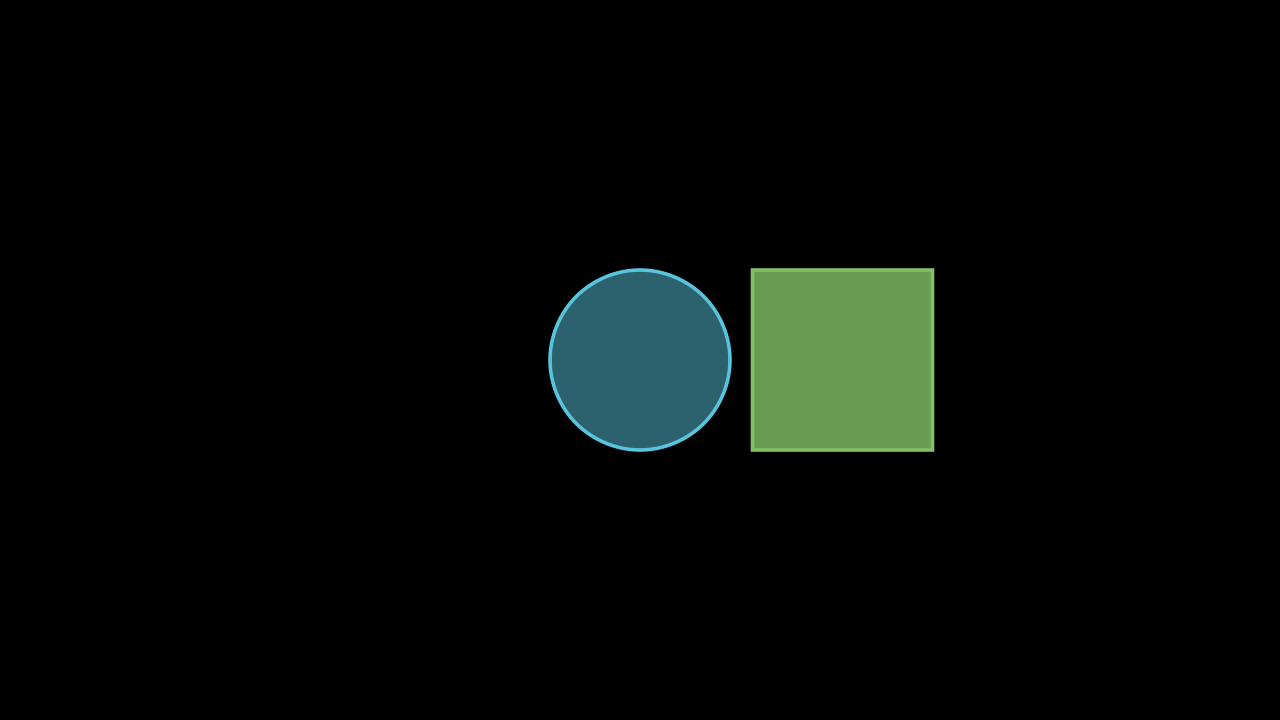

In [3]:
%%manim -qm FirstExample

class FirstExample(Scene):
    def construct(self):
        blue_circle = Circle(color=BLUE, fill_opacity=0.5)
        green_square = Square(color=GREEN, fill_opacity=0.8)
        green_square.next_to(blue_circle, RIGHT)
        self.add(blue_circle, green_square)

In [ ]:
%%manim -qm SecondExample

class SecondExample(Scene):
    def construct(self):
        ax = Axes(x_range=(-3, 3), y_range=(-3, 3))
        curve = ax.plot(lambda x: (x+2)*x*(x-2)/2, color=RED)
        area = ax.get_area(curve, (-2, 0))
        self.add(ax, curve, area)

## Part 3: Where are the Animations?!

In [ ]:
%%manim -qm SecondExample

class SecondExample(Scene):
    def construct(self):
        ax = Axes(x_range=(-3, 3), y_range=(-3, 3))
        curve = ax.plot(lambda x: (x+2)*x*(x-2)/2, color=RED)
        area = ax.get_area(curve, x_range=(-2, 0))
        self.play(Create(ax, run_time=2), Create(curve, run_time=5))
        self.play(FadeIn(area))
        self.wait(2)

In [ ]:
%%manim -qm SquareToCircle

class SquareToCircle(Scene):
    def construct(self):
        green_square = Square(color=GREEN, fill_opacity=0.5)
        self.play(DrawBorderThenFill(green_square))
        blue_circle = Circle(color=BLUE, fill_opacity=0.5)
        self.play(ReplacementTransform(green_square, blue_circle))
        self.play(Indicate(blue_circle))
        self.play(FadeOut(blue_circle))

## Bonus: Complex Exponential Spiral

This has not been discussed in the first episode, but might nonetheless give you a good impression of how a more complex (pun intended) scene looks like.

In [ ]:
%%manim -qm ComplexExp

class ComplexExp(ThreeDScene):
    def construct(self):
        axes = ThreeDAxes(x_range=(-0.1, 4.25), y_range=(-1.5, 1.5), z_range=(-1.5, 1.5), y_length=5, z_length=5)
        curve = ParametricFunction(
            lambda p: axes.coords_to_point(p, np.exp(complex(0, PI*p)).real, np.exp(complex(0, PI*p)).imag),
            t_range=(0, 2, 0.1)
        )
        curve_extension = ParametricFunction(
            lambda p: axes.coords_to_point(p, np.exp(complex(0, PI*p)).real, np.exp(complex(0, PI*p)).imag),
            t_range=(2, 4, 0.1)
        )
        t = MathTex("z = e^{t \pi i}, \quad t\in [0, 2]")
        t.rotate(axis=OUT, angle=90*DEGREES).rotate(axis=UP, angle=90*DEGREES)
        t.next_to(curve, UP + OUT)
        self.set_camera_orientation(phi=90*DEGREES, theta=0, focal_distance=10000)
        self.add(axes)
        self.play(Create(curve, run_time=2), Write(t))
        self.wait()
        self.move_camera(phi=75*DEGREES, theta=-30*DEGREES)
        self.wait()
        four = MathTex("4").rotate(axis=OUT, angle=90*DEGREES).rotate(axis=UP, angle=90*DEGREES)
        four.move_to(t[0][12])
        self.play(Create(curve_extension, run_time=2), t[0][12].animate.become(four))
        self.wait()
        self.move_camera(phi=90*DEGREES, theta=-90*DEGREES, focal_distance=10000)
        self.wait()
        self.move_camera(phi=75*DEGREES, theta=-30*DEGREES)
        self.wait()
        self.move_camera(phi=0, theta=-90*DEGREES, focal_distance=10000)
        self.wait()
        self.move_camera(phi=75*DEGREES, theta=-30*DEGREES)
        self.wait()
        self.play(FadeOut(axes, curve, curve_extension, t, shift=IN))
        self.wait()
        